In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

from sklearn.tree import DecisionTreeRegressor as dtr

import warnings
warnings.filterwarnings('ignore')

In [2]:
f = open('data_description.txt', 'r')
f = f.readlines()

f

['MSSubClass: Identifies the type of dwelling involved in the sale.\t\n',
 '\n',
 '        20\t1-STORY 1946 & NEWER ALL STYLES\n',
 '        30\t1-STORY 1945 & OLDER\n',
 '        40\t1-STORY W/FINISHED ATTIC ALL AGES\n',
 '        45\t1-1/2 STORY - UNFINISHED ALL AGES\n',
 '        50\t1-1/2 STORY FINISHED ALL AGES\n',
 '        60\t2-STORY 1946 & NEWER\n',
 '        70\t2-STORY 1945 & OLDER\n',
 '        75\t2-1/2 STORY ALL AGES\n',
 '        80\tSPLIT OR MULTI-LEVEL\n',
 '        85\tSPLIT FOYER\n',
 '        90\tDUPLEX - ALL STYLES AND AGES\n',
 '       120\t1-STORY PUD (Planned Unit Development) - 1946 & NEWER\n',
 '       150\t1-1/2 STORY PUD - ALL AGES\n',
 '       160\t2-STORY PUD - 1946 & NEWER\n',
 '       180\tPUD - MULTILEVEL - INCL SPLIT LEV/FOYER\n',
 '       190\t2 FAMILY CONVERSION - ALL STYLES AND AGES\n',
 '\n',
 'MSZoning: Identifies the general zoning classification of the sale.\n',
 '\t\t\n',
 '       A\tAgriculture\n',
 '       C\tCommercial\n',
 '       FV\tFloat

In [3]:
data = pd.read_csv('train.csv', index_col=0)

data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
data.shape

(1460, 80)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [6]:
data[data.columns[[i for i in range(data.shape[1]) if data[data.columns[i]].isnull().sum()!=0]]].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

# Definitions
## Frontage(LotFrontage):- Frontage is the boundary between a plot of land or a building and the road onto which the plot or building fronts.
## Alley:- Luxurious passageway in house(say bowling game alleys).
## Masonry veneer walls():- Consist of a single non-structural external layer of masonry, typically made of brick, stone or manufactured stone.

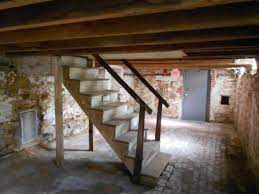

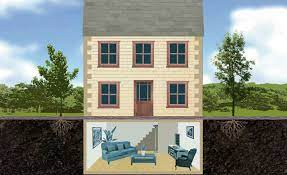

# Hypotheses 
## LotFrontage: Linear feet of street connected to property:-  Small properties may have low Lo...ge than luxurious properties.
## Alley:- Replace NaNs with some suitable replacement.
## MasVnrType: Masonry veneer type:- Old luxurious houses will probably be made of stone, medium aged small properties will probably be of common brick or brick face. New properties will probably have cinder walls. Not sure about None.
## MasVnrArea: Masonry veneer area in square feet:- Area of the masonry.
## BsmtQual: Evaluates the height of the basement:- 
## BsmtCond: Evaluates the general condition of the basement:- 
## BsmtExposure: Refers to walkout or garden level walls:- 
## BsmtFinType1: Rating of basement finished area:-
## BsmtFinType2: Rating of basement finished area (if multiple types):-
## Electrical: Electrical system:-
## FireplaceQu: Fireplace quality:-
## GarageType: Garage location:-
## GarageYrBlt: Year garage was built:-
## GarageFinish: Interior finish of the garage:-
## GarageQual: Garage quality:-
## GarageCond: Garage condition:-
## PoolQC: Pool quality:-
## Fence: Fence quality:-
## MiscFeature: Miscellaneous feature not covered in other categories:-

In [7]:
data[['LotFrontage', 'LotArea']].describe()

,LotFrontage,LotArea
count,1201.000000,1460.000000
mean,70.049958,10516.828082
std,24.284752,9981.264932
min,21.000000,1300.000000
25%,59.000000,7553.500000
50%,69.000000,9478.500000
75%,80.000000,11601.500000
max,313.000000,215245.000000


In [8]:
data[['LotFrontage', 'LotArea']].corr()

,LotFrontage,LotArea
LotFrontage,1.000000,0.426095
LotArea,0.426095,1.000000


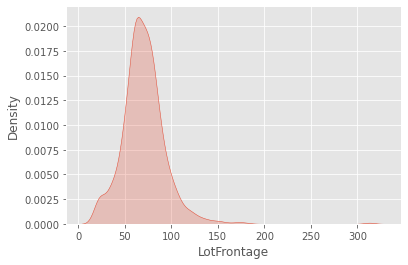

In [9]:
sns.kdeplot(data['LotFrontage'], fill=True)

In [10]:
cat_cols = data[data.columns[[i for i in range(data.shape[1]) if data[data.columns[i]].nunique()<=25]]]

In [11]:
num_cols = data[[col for col in data.columns[:-1] if col not in cat_cols.columns]]

In [12]:
corr_matrix = num_cols.corr()

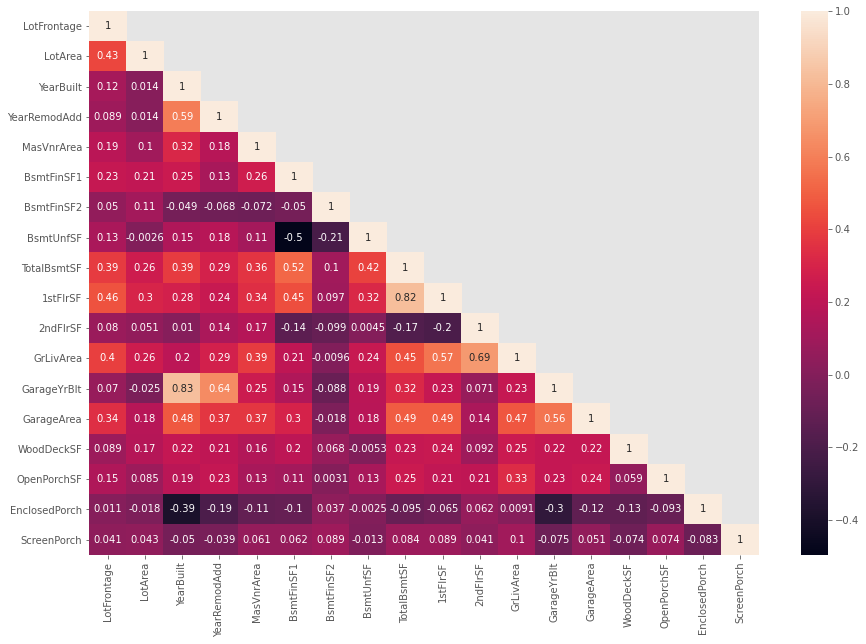

In [13]:
fig, axs = plt.subplots(figsize=(15, 10))
lower_triangle = corr_matrix.where(np.tril(np.ones(num_cols.corr().shape)).astype(np.bool))
sns.heatmap(lower_triangle, annot=True, ax=axs)

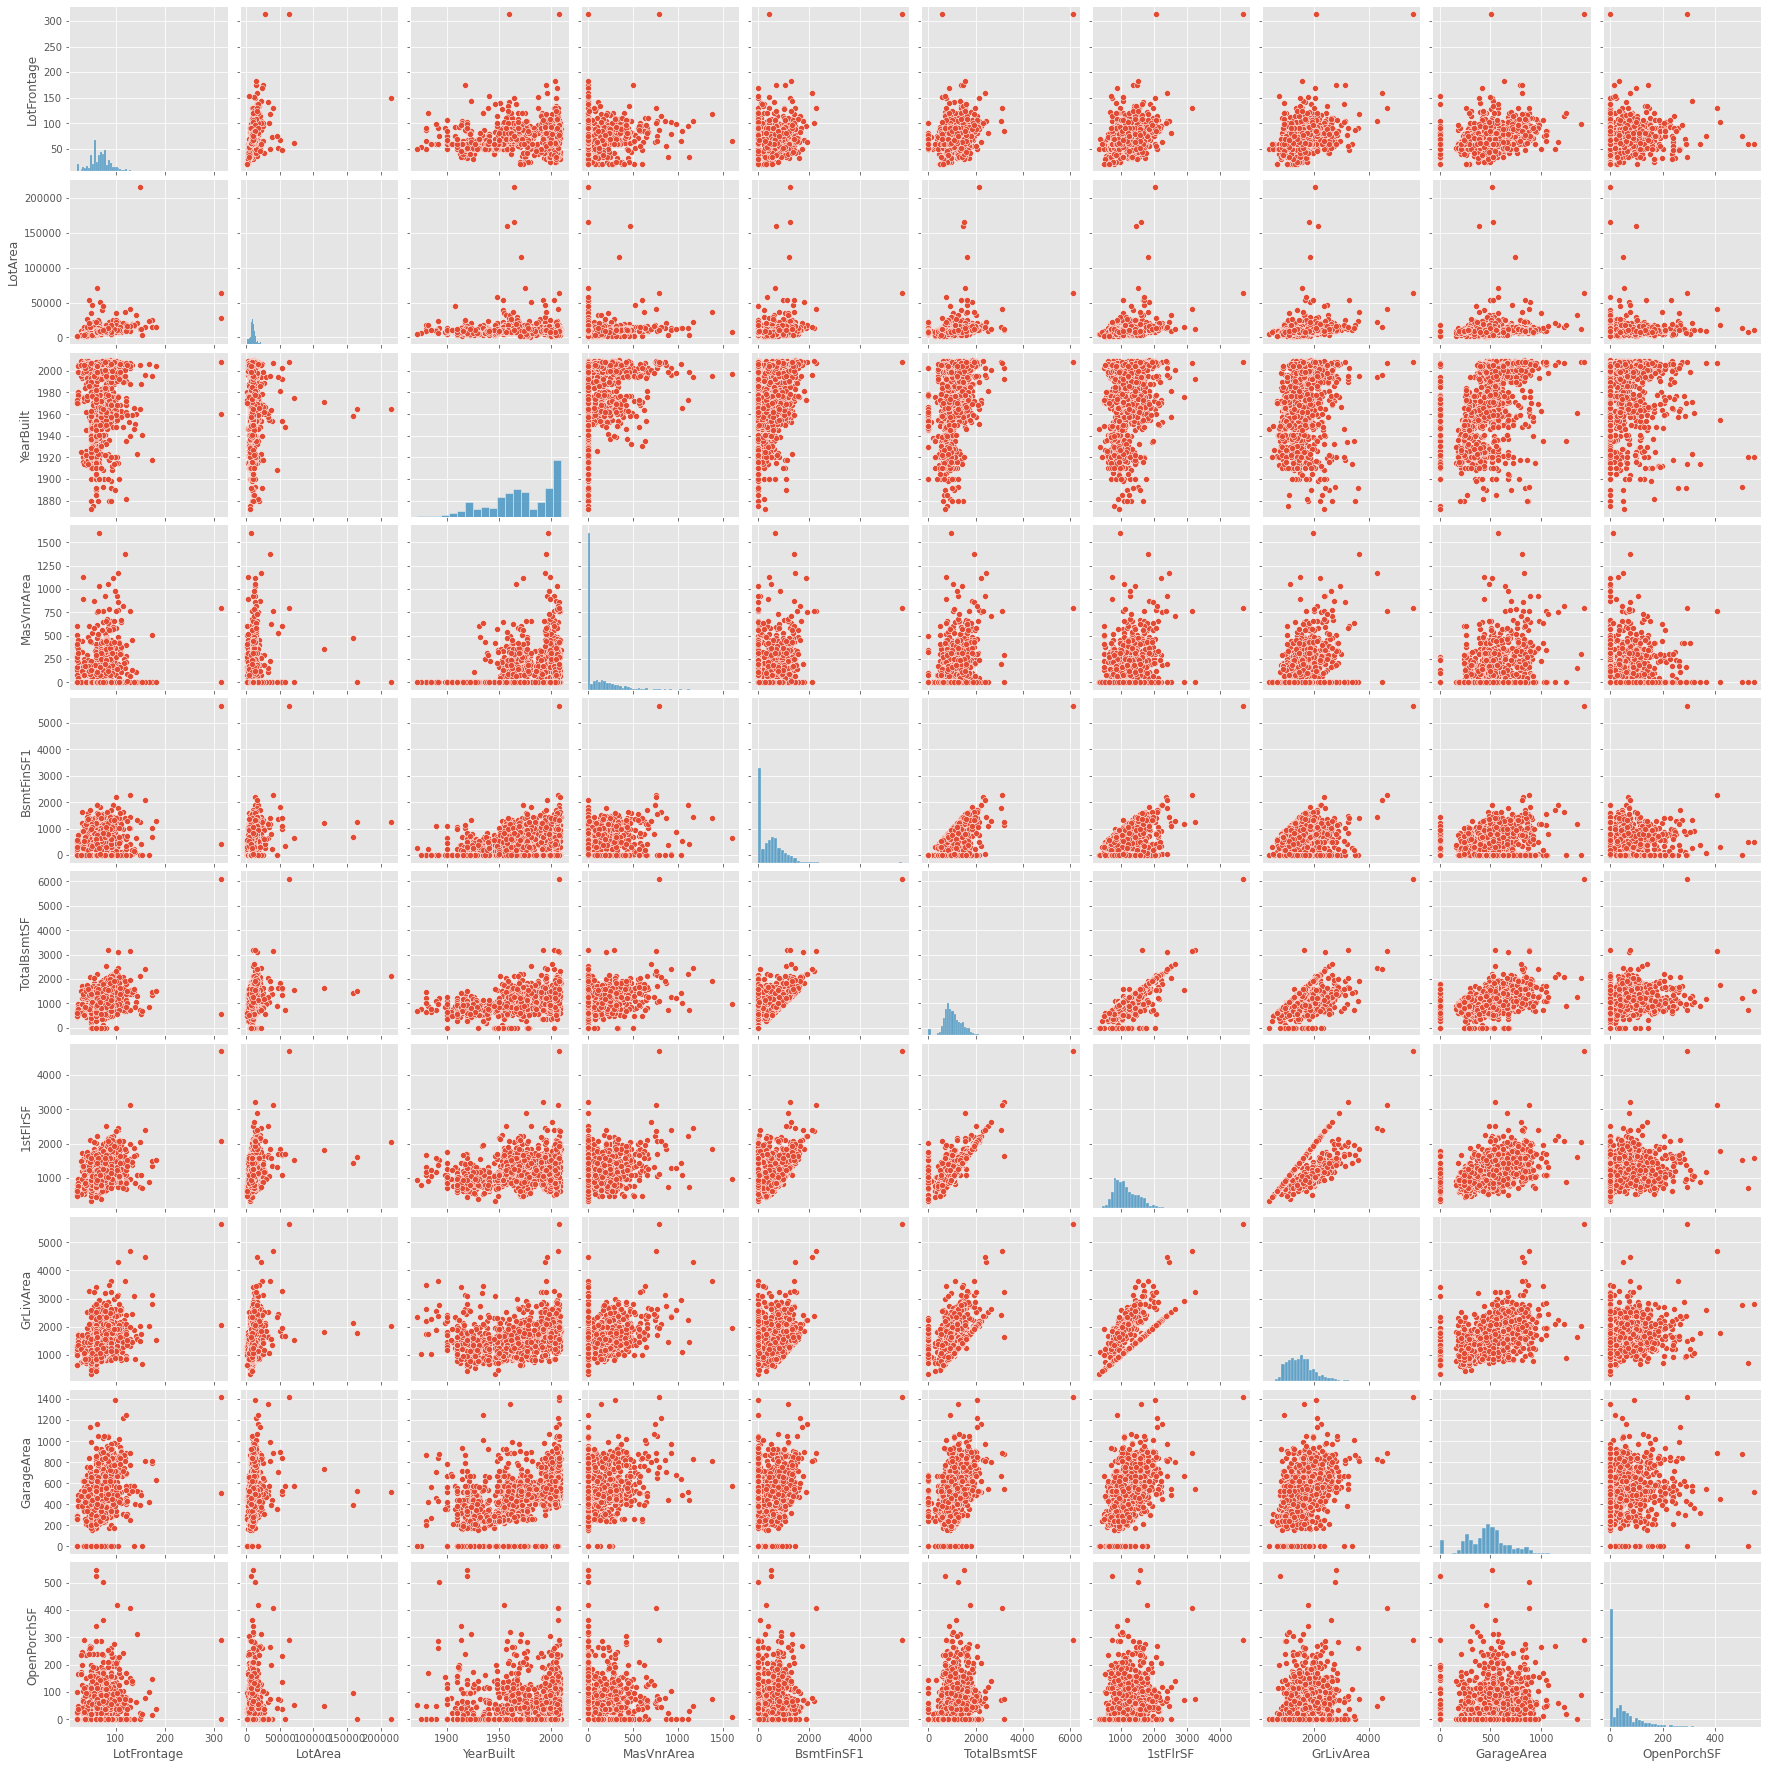

In [19]:
sns.pairplot(data[['LotFrontage', 'LotArea', 'YearBuilt', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', \
                   'GarageArea', 'OpenPorchSF']])

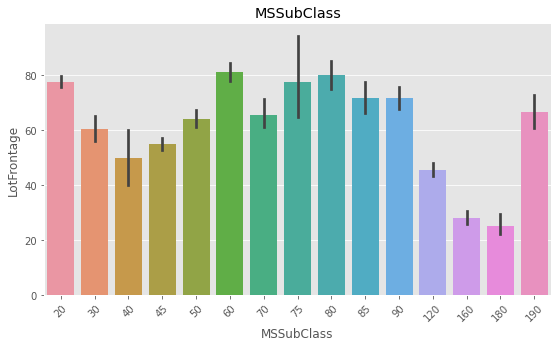

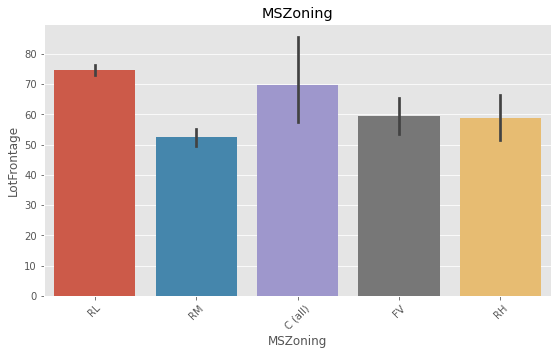

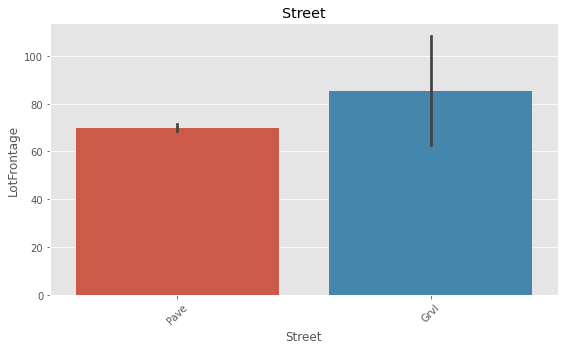

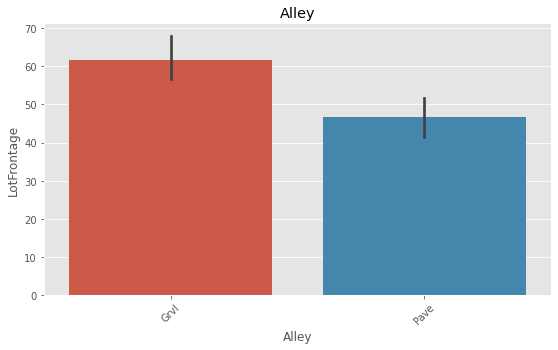

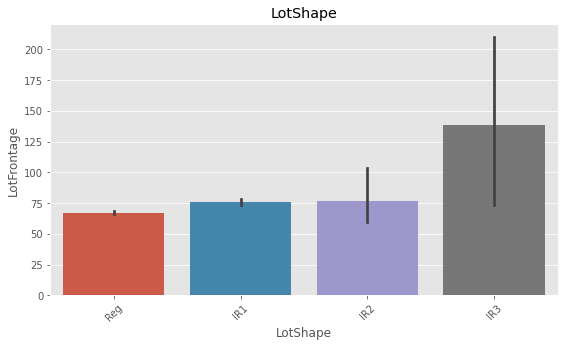

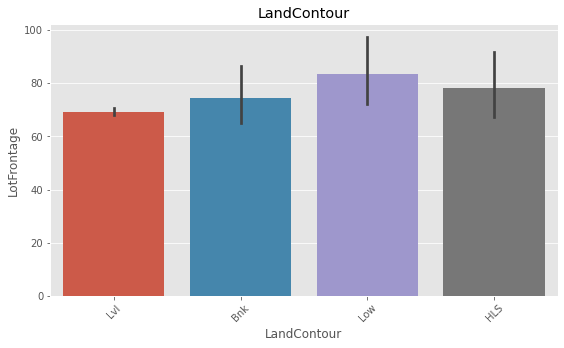

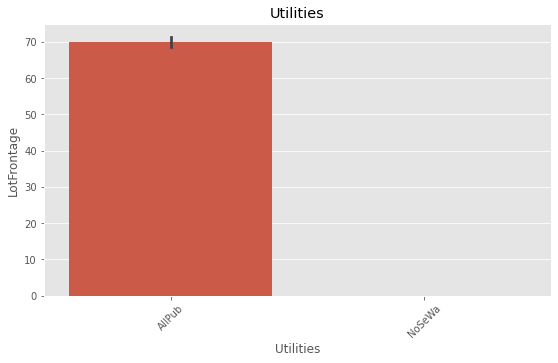

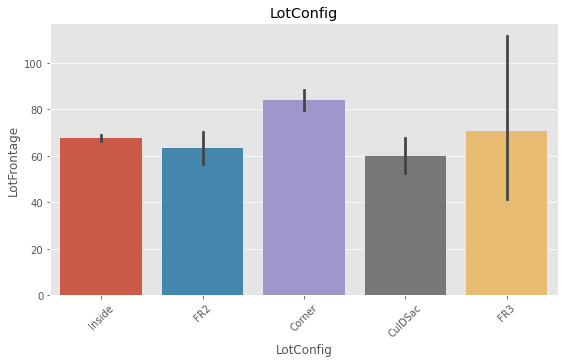

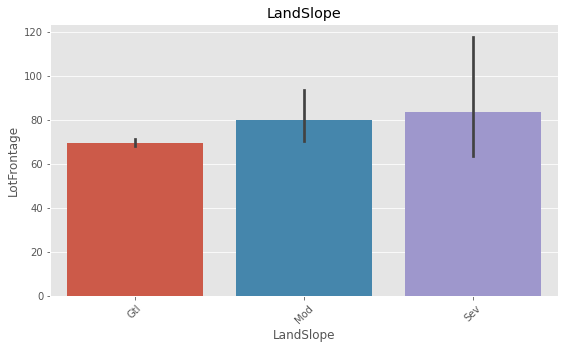

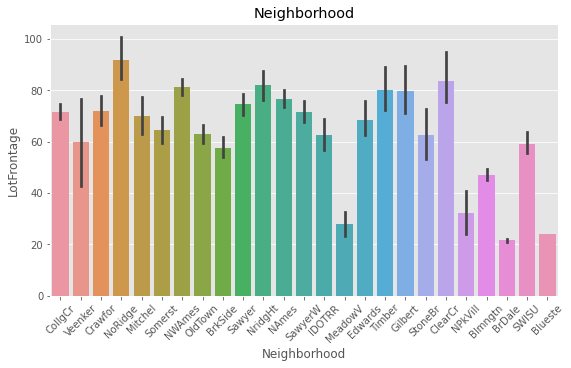

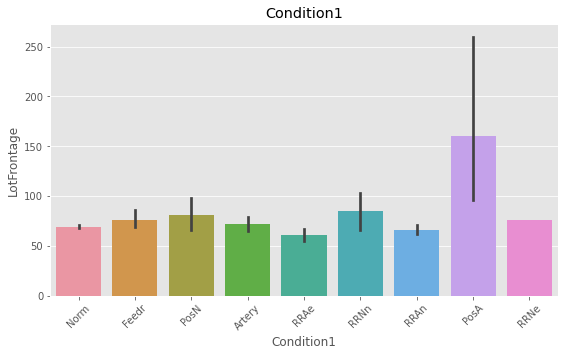

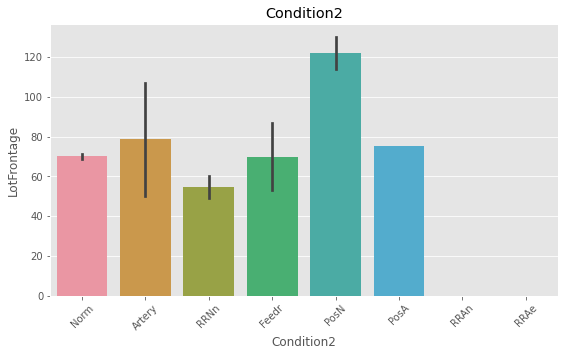

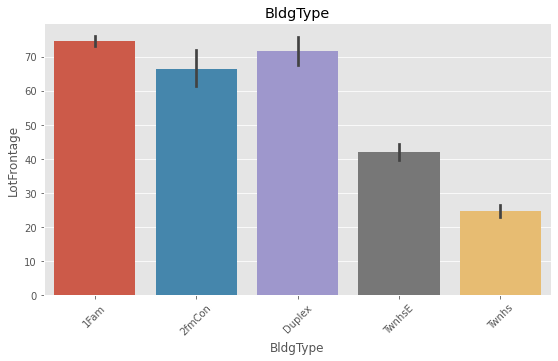

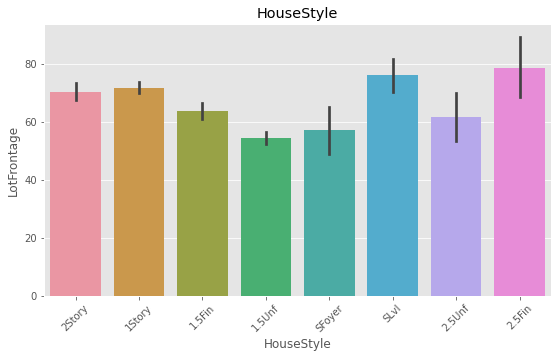

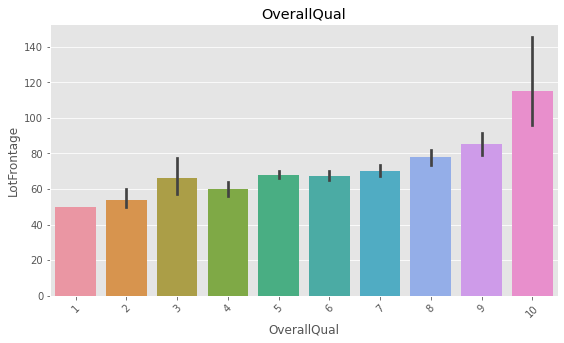

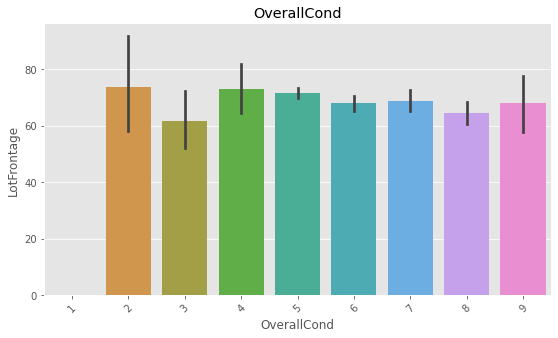

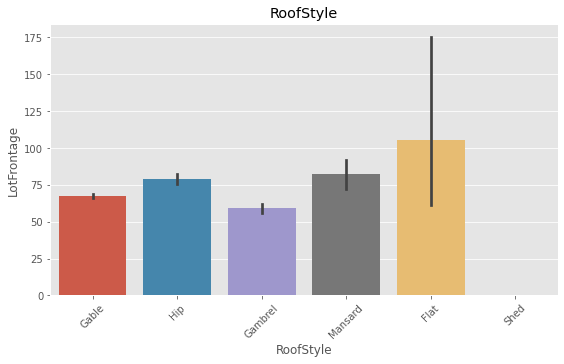

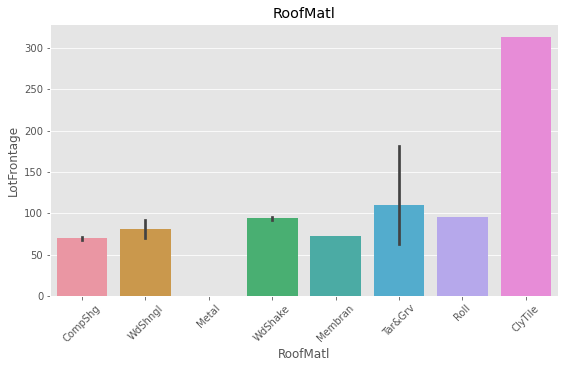

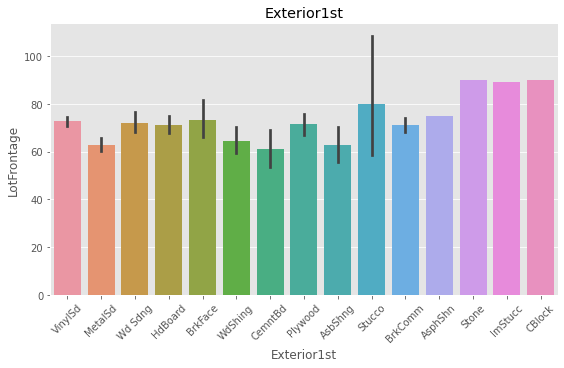

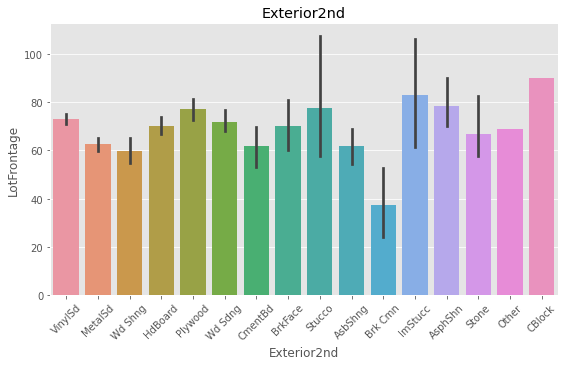

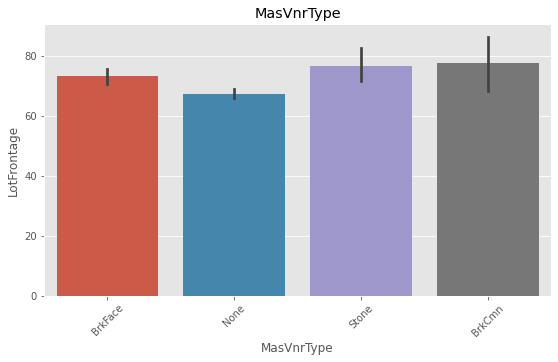

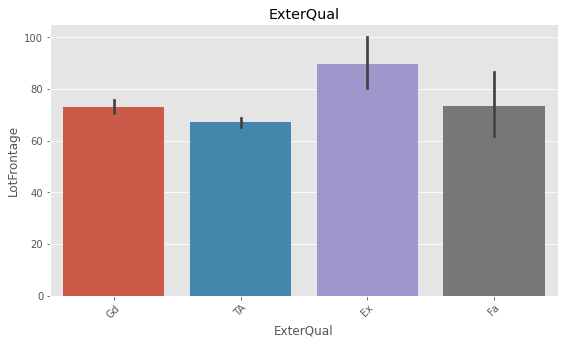

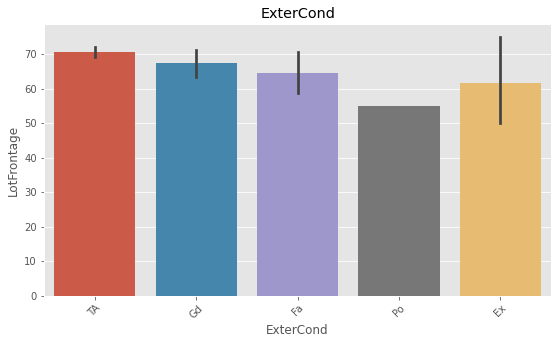

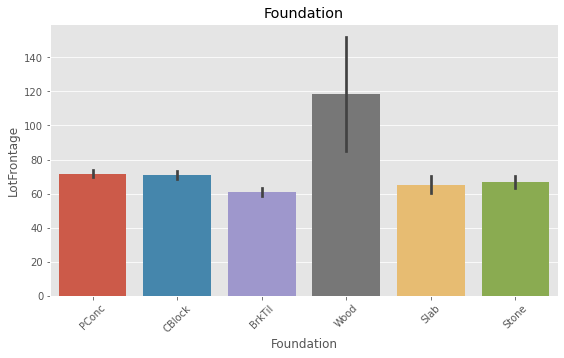

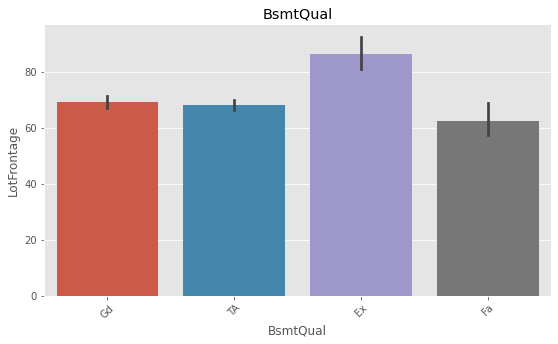

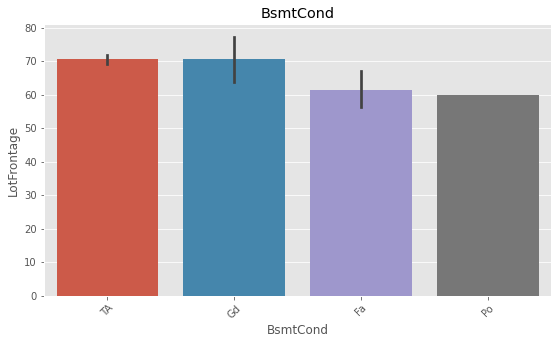

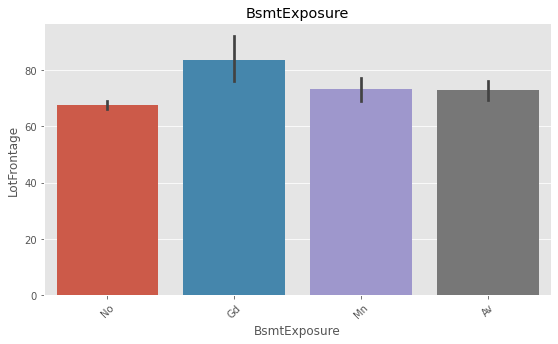

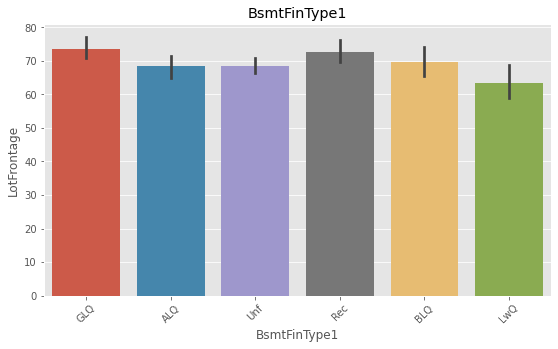

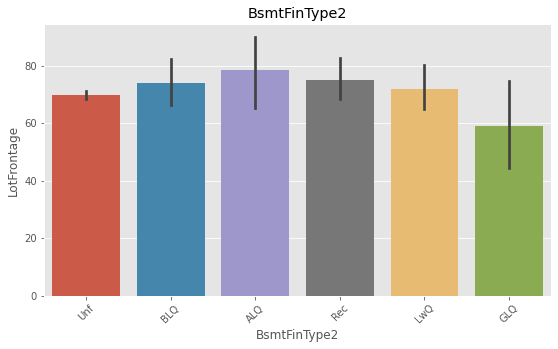

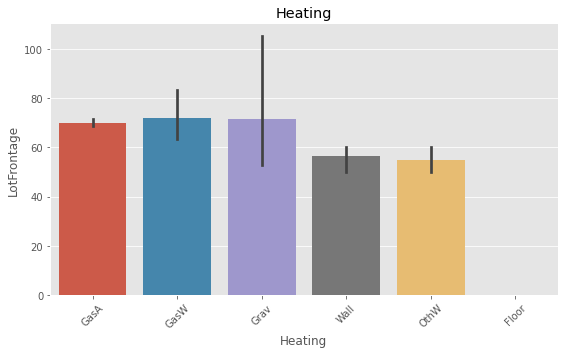

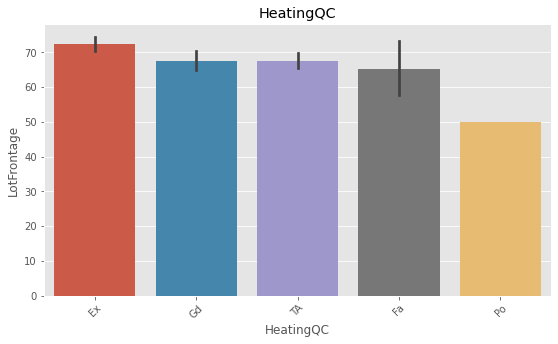

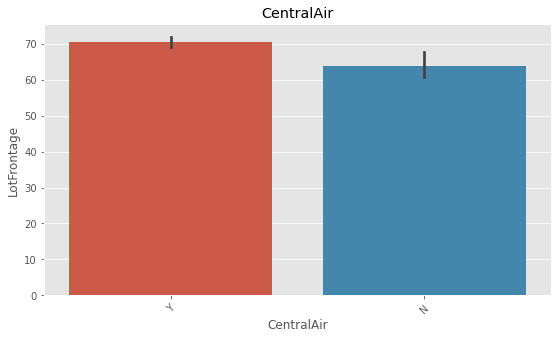

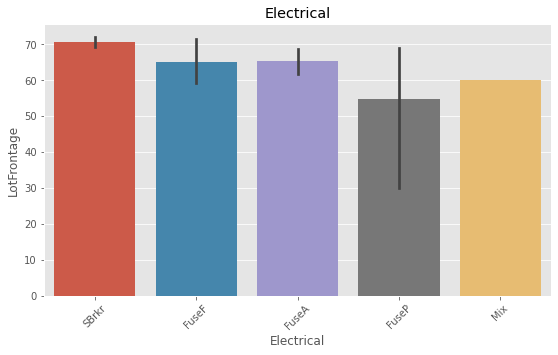

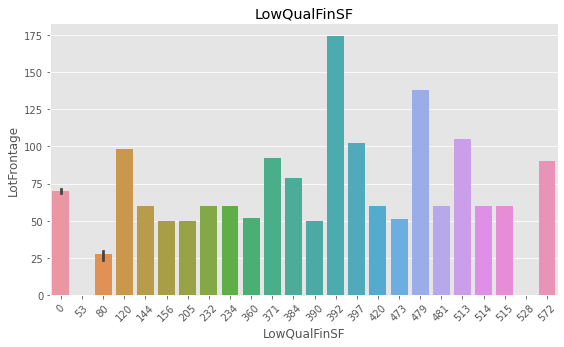

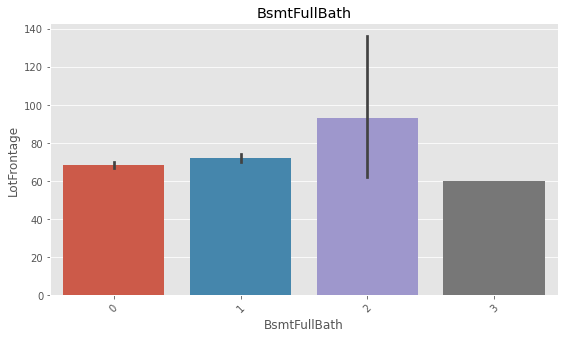

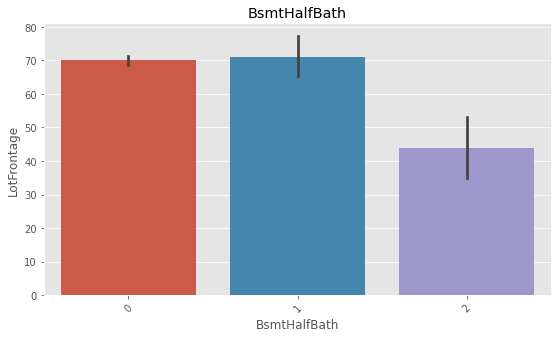

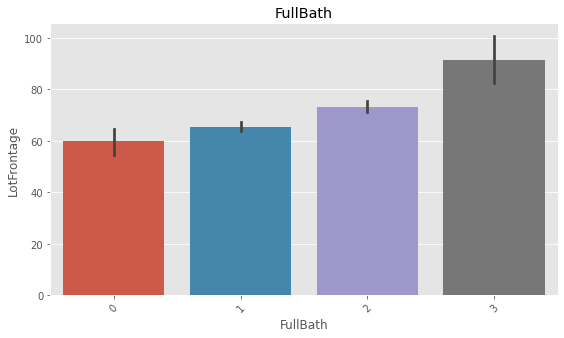

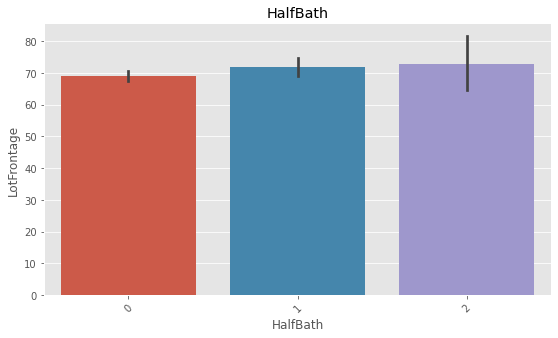

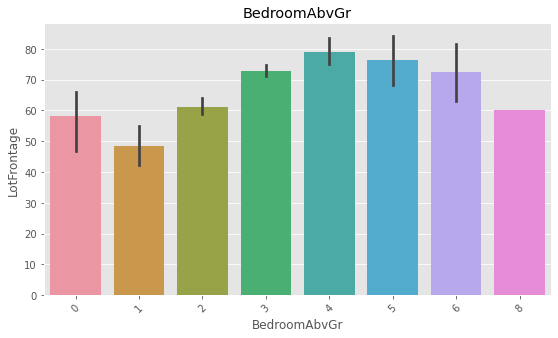

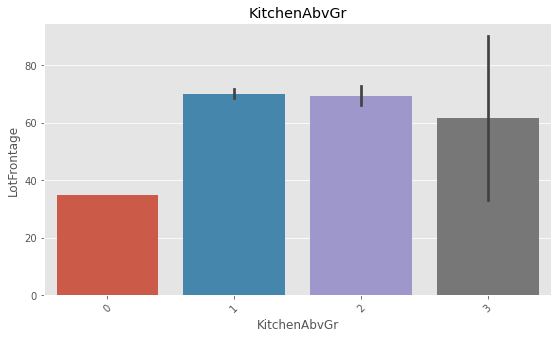

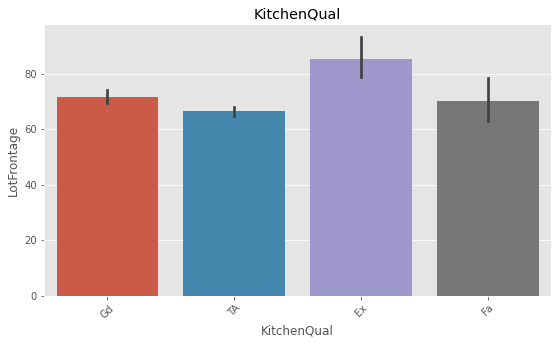

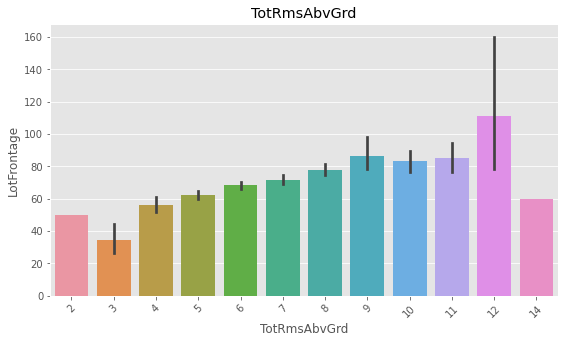

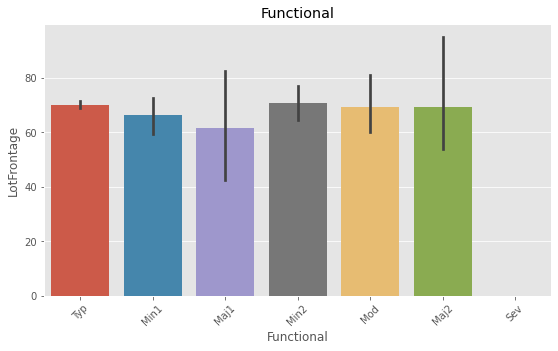

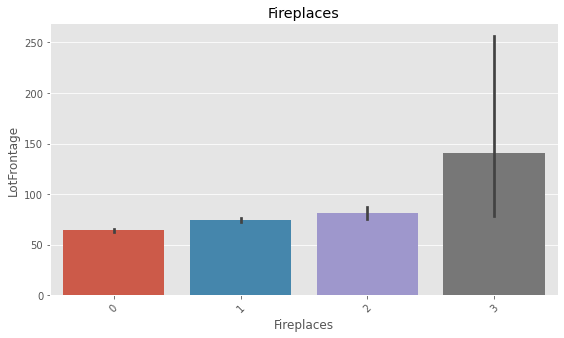

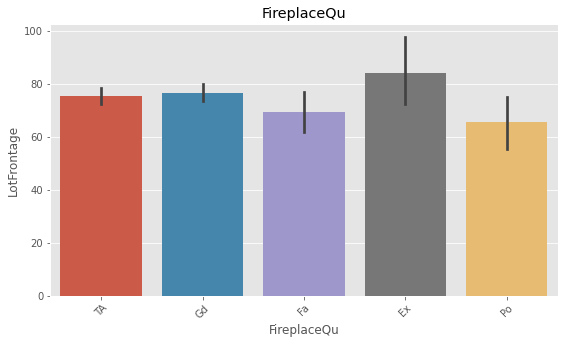

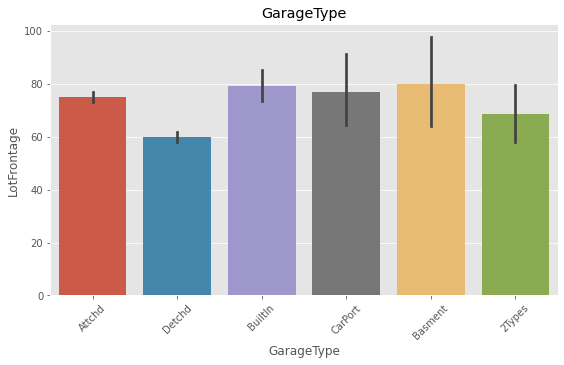

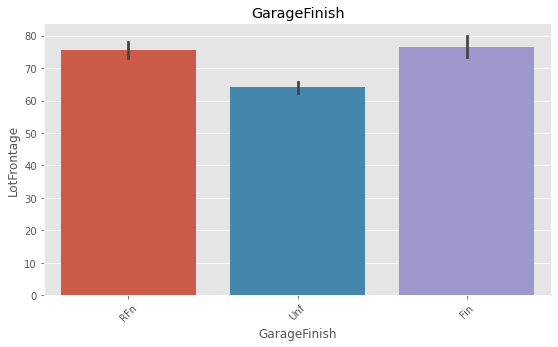

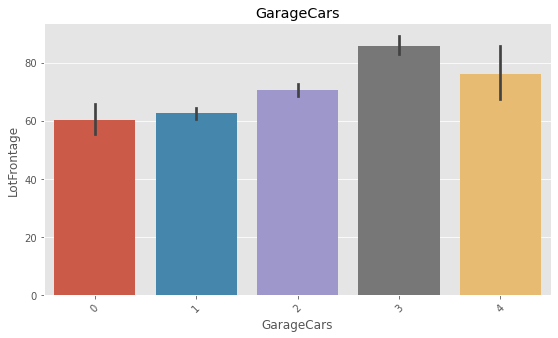

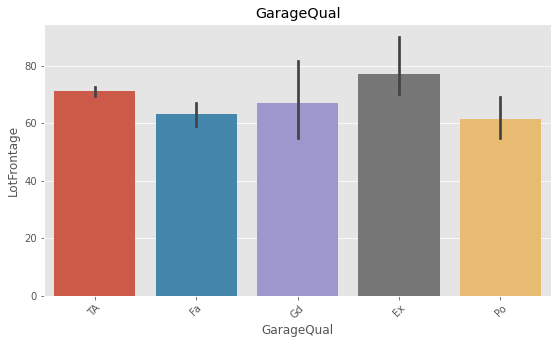

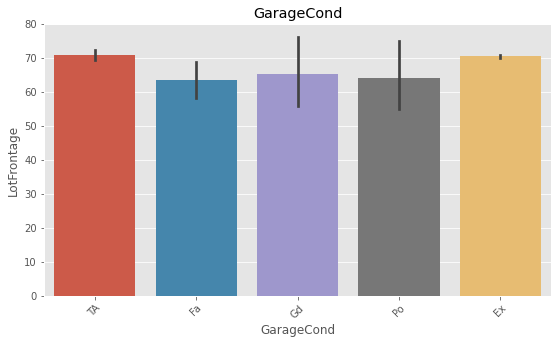

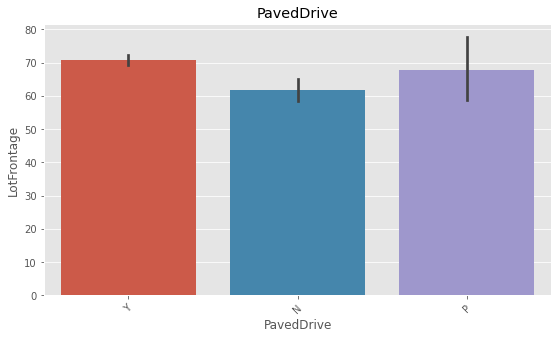

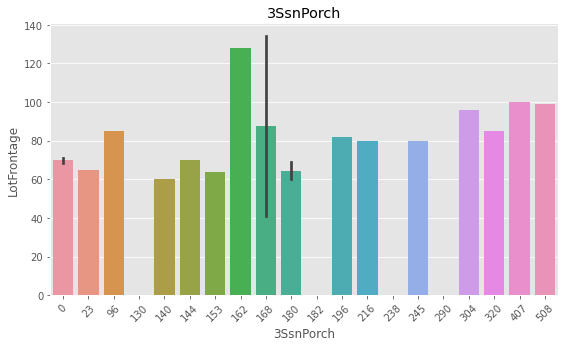

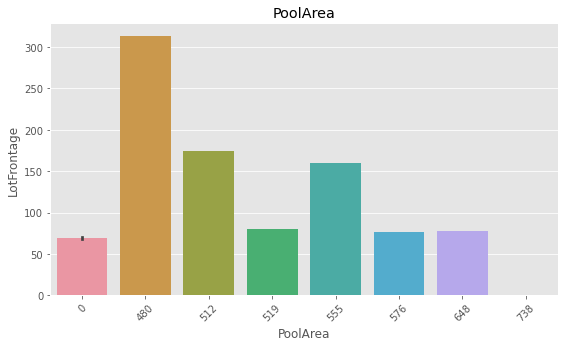

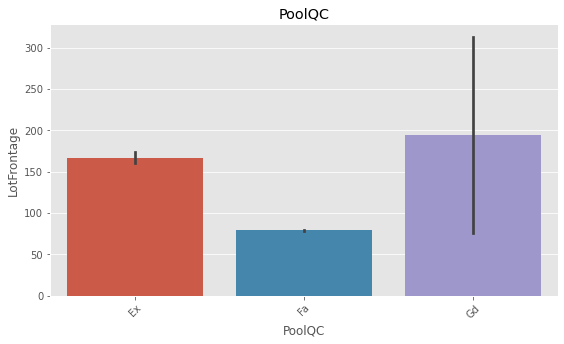

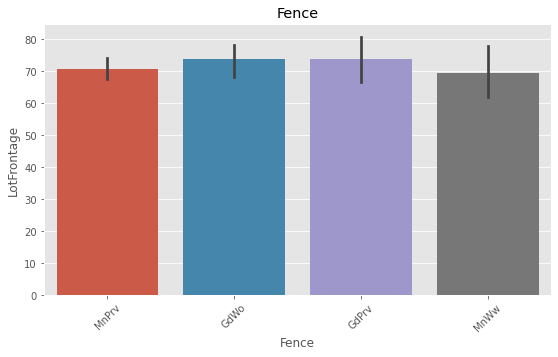

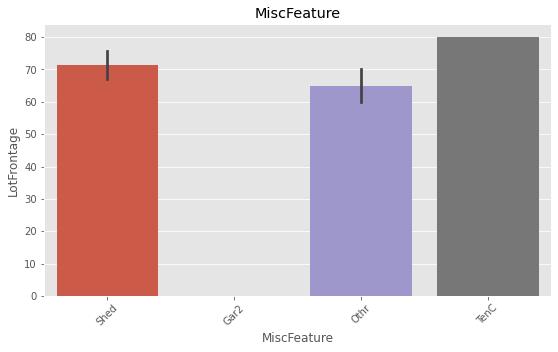

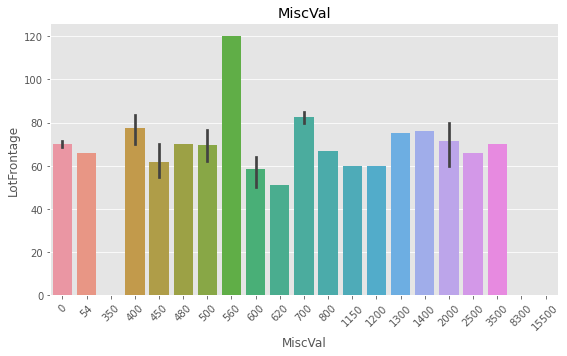

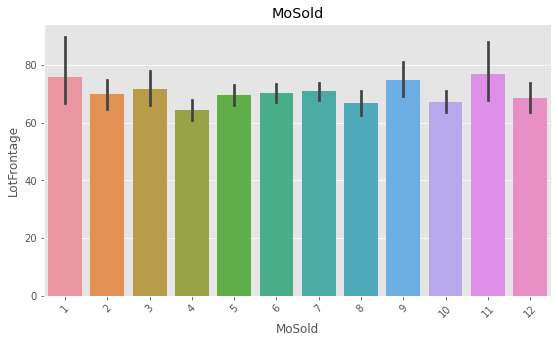

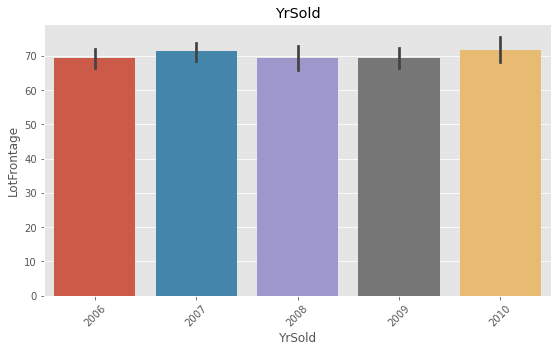

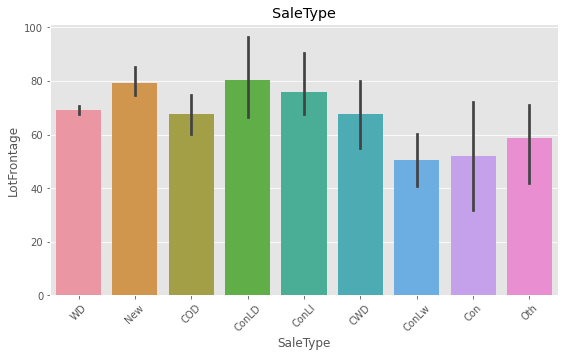

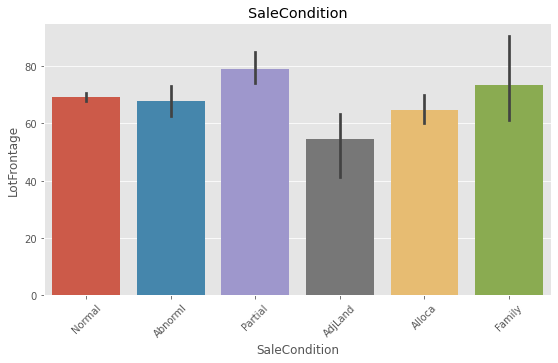

In [17]:
for col in cat_cols.columns :
    plt.figure(figsize=(20, 5))
    plt.subplot(121)
    plt.title(col)
    plt.xticks(rotation=45)
    sns.barplot(data[col], data['LotFrontage'])

In [18]:
#MSSubClass, Neighborhood, 3SsnPorch, LotArea

In [15]:
imp_train = data[['MSSubClass', 'Neighborhood', '3SsnPorch', 'LotArea', 'LotFrontage']][data['LotFrontage'].isnull() == False]
imp_test = data[['MSSubClass', 'Neighborhood', '3SsnPorch', 'LotArea']][data['LotFrontage'].isnull()]

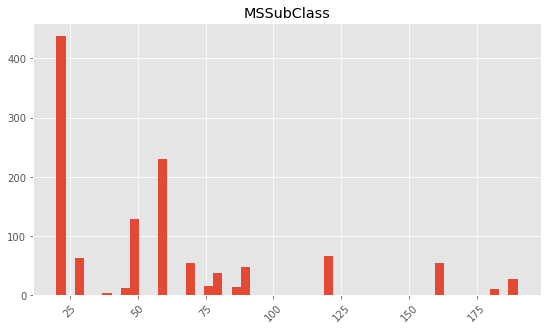

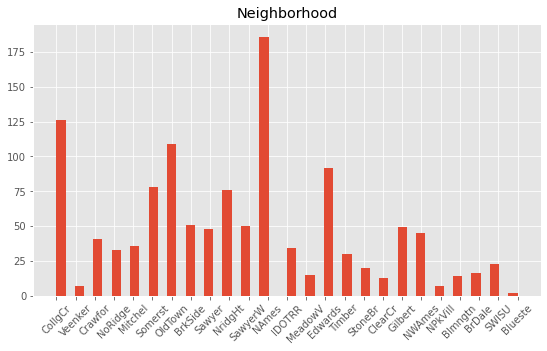

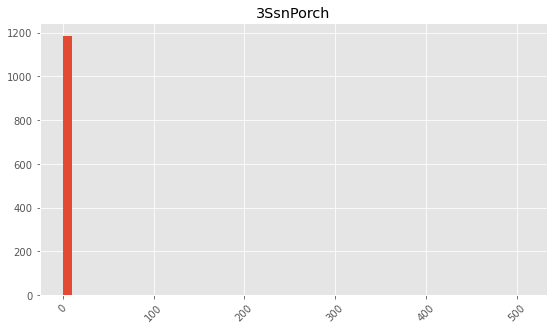

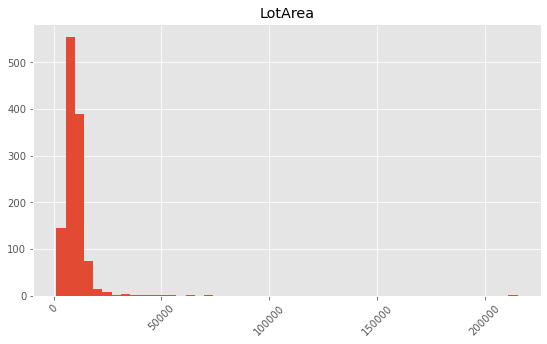

In [20]:
for col in imp_train.columns[: -1] :
    plt.figure(figsize=(20, 5))
    plt.subplot(121)
    plt.title(col)
    plt.xticks(rotation=45)
    #sns.barplot(imp_train[col], imp_train['LotFrontage'])
    plt.hist(imp_train[col], bins=50)

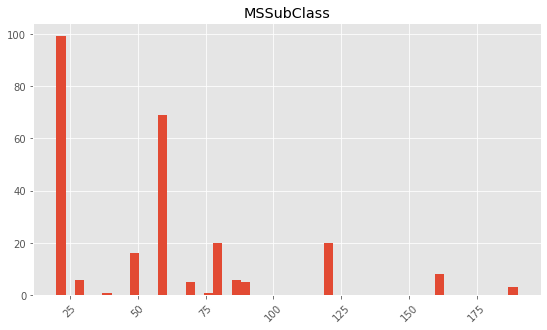

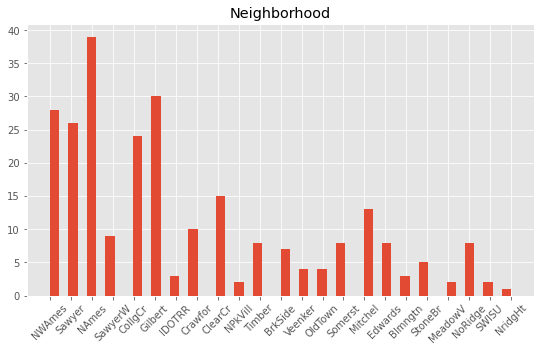

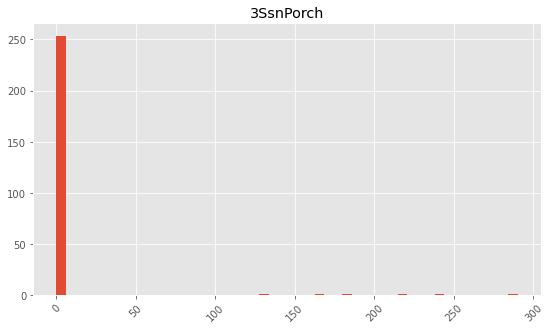

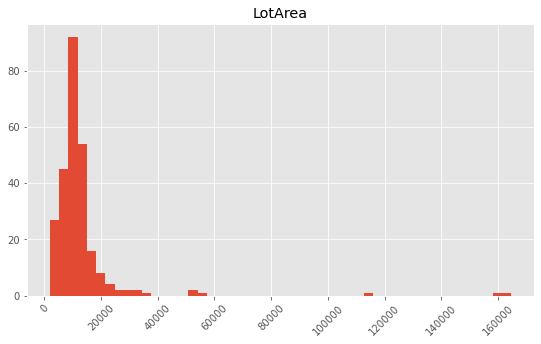

In [21]:
for col in imp_test.columns :
    plt.figure(figsize=(20, 5))
    plt.subplot(121)
    plt.title(col)
    plt.xticks(rotation=45)
    #sns.barplot(data[col], data['LotFrontage'])
    plt.hist(imp_test[col], bins=50)

In [16]:
freq = imp_train.groupby('Neighborhood').size() / len(imp_train)
imp_train.loc[:, 'Neighborhood'] = imp_train['Neighborhood'].map(freq)

imp_train

,MSSubClass,Neighborhood,3SsnPorch,LotArea,LotFrontage
Id,,,,,
1,60,0.104913,0,8450,65.0
2,20,0.005828,0,9600,80.0
3,60,0.104913,0,11250,68.0
4,70,0.034138,0,9550,60.0
5,60,0.027477,0,14260,84.0
...,...,...,...,...,...
1456,60,0.040799,0,7917,62.0
1457,20,0.037469,0,13175,85.0
1458,70,0.034138,0,9042,66.0


In [17]:
imp = dtr(random_state=44)

imp.fit(imp_train.iloc[:, :-1], imp_train.iloc[:, -1])

DecisionTreeRegressor(random_state=44)

In [104]:
import joblib

joblib.dump(imp, 'saved_model.pkl')

['saved_model.pkl']

In [18]:
freq_test = imp_test.groupby('Neighborhood').size() / len(imp_test)
imp_test.loc[:, 'Neighborhood'] = imp_test['Neighborhood'].map(freq_test)

imp_test

,MSSubClass,Neighborhood,3SsnPorch,LotArea
Id,,,,
8,60,0.108108,0,10382
13,20,0.100386,0,12968
15,20,0.150579,0,10920
17,20,0.150579,0,11241
25,20,0.100386,0,8246
...,...,...,...,...
1430,20,0.108108,0,12546
1432,120,0.007722,0,4928
1442,120,0.092664,0,4426


In [19]:
imput_val = imp.predict(imp_test)

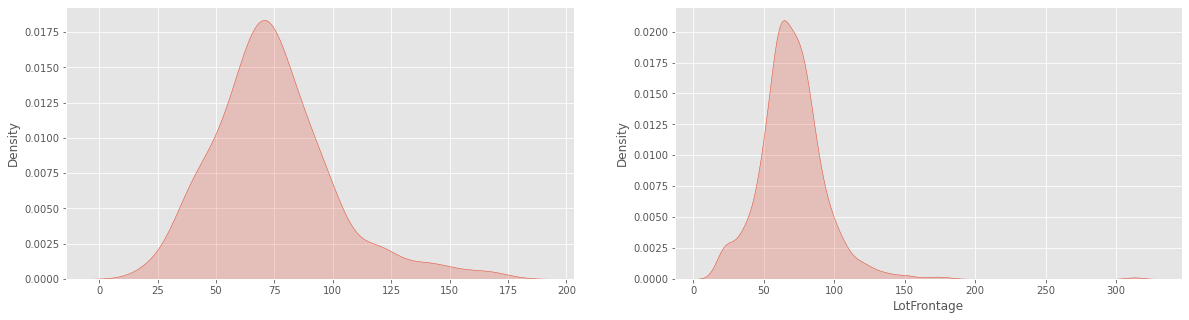

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))
sns.kdeplot(imput_val, fill=True, ax=axs[0])
sns.kdeplot(data['LotFrontage'], fill=True, ax=axs[1])

In [20]:
data['LotFrontage'][data['LotFrontage'].isnull()] = imput_val.copy()

In [21]:
data['Alley'].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [22]:
data['Alley'].fillna('No Alley', inplace=True)

In [23]:
data['MasVnrType'].unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

In [24]:
#MasVnrType         8
#MasVnrArea         8

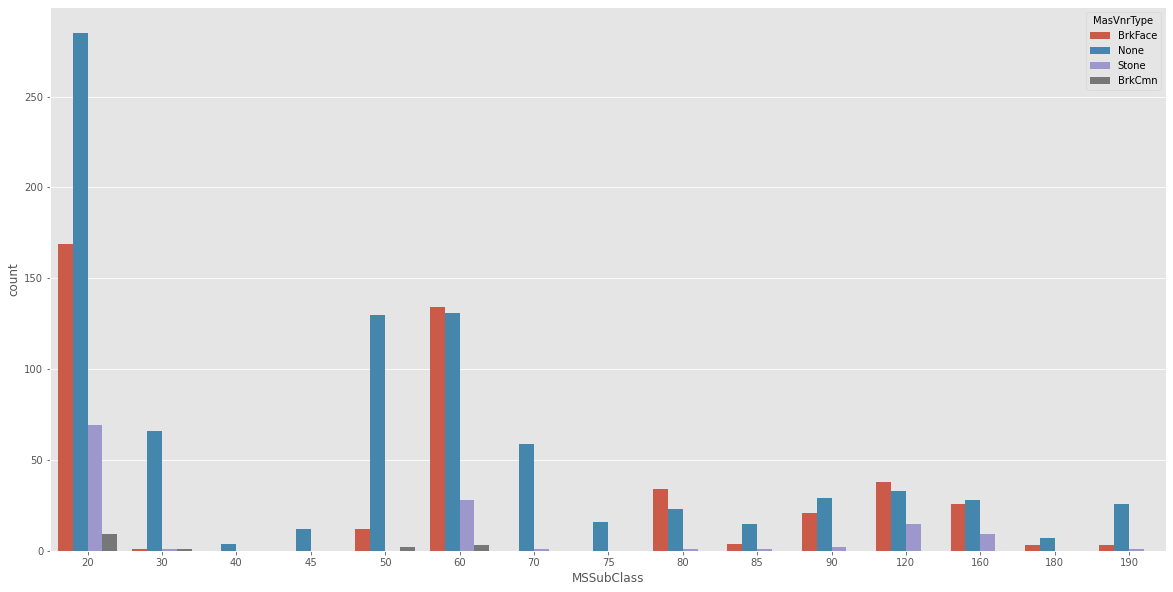

In [32]:
plt.figure(figsize=(20, 10))
sns.countplot(data['MSSubClass'], hue=data['MasVnrType'])

In [33]:
data.groupby(['MSSubClass', 'MasVnrType']).size()

MSSubClass  MasVnrType
20          BrkCmn          9
            BrkFace       169
            None          285
            Stone          69
30          BrkCmn          1
            BrkFace         1
            None           66
            Stone           1
40          None            4
45          None           12
50          BrkCmn          2
            BrkFace        12
            None          130
60          BrkCmn          3
            BrkFace       134
            None          131
            Stone          28
70          None           59
            Stone           1
75          None           16
80          BrkFace        34
            None           23
            Stone           1
85          BrkFace         4
            None           15
            Stone           1
90          BrkFace        21
            None           29
            Stone           2
120         BrkFace        38
            None           33
            Stone          15
160         BrkFa

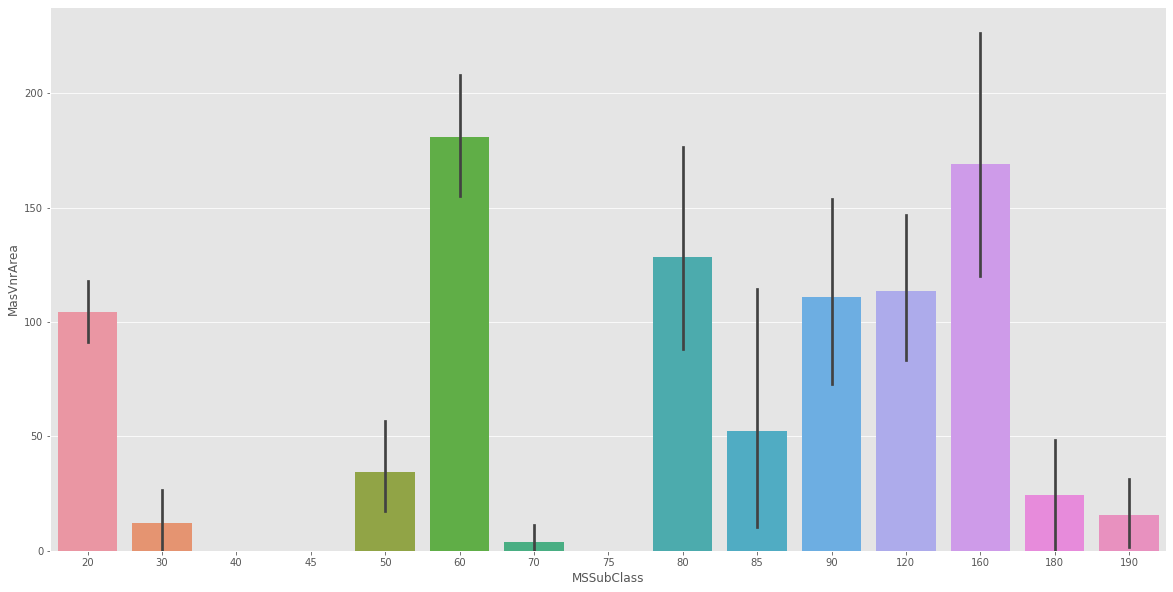

In [34]:
plt.figure(figsize=(20, 10))
sns.barplot(data['MSSubClass'], data['MasVnrArea'])

In [25]:
data[['MSSubClass', 'MasVnrType']][data['MasVnrType'].isnull()]

,MSSubClass,MasVnrType
Id,,
235,60,NaN
530,20,NaN
651,60,NaN
937,20,NaN
974,20,NaN
978,120,NaN
1244,20,NaN
1279,60,NaN


In [26]:
data['MasVnrType'][data['MasVnrType'].isnull()] = ['BrkFace', 'None', 'BrkFace', 'BrkFace', 'None', 'BrkFace', 'BrkFace',\
                                                   'None']

In [27]:
data['MasVnrArea'][data['MasVnrArea'].isnull()] = [data['MasVnrArea'][data['MSSubClass']==60].mean(),\
                                                   data['MasVnrArea'][data['MSSubClass']==20].mean(),\
                                                   data['MasVnrArea'][data['MSSubClass']==60].mean(),\
                                                   data['MasVnrArea'][data['MSSubClass']==20].mean(),\
                                                   data['MasVnrArea'][data['MSSubClass']==20].mean(),\
                                                   data['MasVnrArea'][data['MSSubClass']==120].mean(),\
                                                   data['MasVnrArea'][data['MSSubClass']==20].mean(),\
                                                   data['MasVnrArea'][data['MSSubClass']==60].mean()]

In [28]:
'''BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38'''

'BsmtQual          37\nBsmtCond          37\nBsmtExposure      38\nBsmtFinType1      37\nBsmtFinType2      38'

In [29]:
data[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']][data['BsmtExposure'].isnull()]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2
Id,,,,,
18,NaN,NaN,NaN,NaN,NaN
40,NaN,NaN,NaN,NaN,NaN
91,NaN,NaN,NaN,NaN,NaN
103,NaN,NaN,NaN,NaN,NaN
157,NaN,NaN,NaN,NaN,NaN
183,NaN,NaN,NaN,NaN,NaN
260,NaN,NaN,NaN,NaN,NaN
343,NaN,NaN,NaN,NaN,NaN
363,NaN,NaN,NaN,NaN,NaN


In [30]:
data[['BsmtFinType1', 'BsmtFinType2']].mode()

,BsmtFinType1,BsmtFinType2
0,Unf,Unf


In [31]:
data['BsmtExposure'][data['BsmtFinType1']=='Unf'].mode()

0    No
dtype: object

In [32]:
data['BsmtExposure'][data['BsmtFinType2']=='Unf'].mode()

0    No
dtype: object

In [33]:
data['BsmtExposure'][949] = data.loc[949][['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']].fillna('No')

In [34]:
data['BsmtExposure'].isnull().sum()

37

In [35]:
data[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']][data['BsmtFinType2'].isnull()]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2
Id,,,,,
18,NaN,NaN,NaN,NaN,NaN
40,NaN,NaN,NaN,NaN,NaN
91,NaN,NaN,NaN,NaN,NaN
103,NaN,NaN,NaN,NaN,NaN
157,NaN,NaN,NaN,NaN,NaN
183,NaN,NaN,NaN,NaN,NaN
260,NaN,NaN,NaN,NaN,NaN
333,Gd,TA,No,GLQ,NaN
343,NaN,NaN,NaN,NaN,NaN


In [36]:
data['BsmtFinType2'][data['BsmtFinType1'] == 'GLQ'].value_counts()

Unf    392
LwQ     10
Rec      9
ALQ      4
BLQ      2
Name: BsmtFinType2, dtype: int64

In [37]:
data.BsmtFinType2.isnull().sum()

38

In [38]:
data['BsmtFinType2'][333] = data.loc[333][['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']].fillna('Unf')

In [39]:
data['BsmtFinType1'].unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ'], dtype=object)

In [50]:
'''data['BsmtQual'].fillna('No Basement', inplace=True)
data['BsmtCond'].fillna('No Basement', inplace=True)
data['BsmtExposure'].fillna('No Basement', inplace=True)
data['BsmtFinType1'].fillna('No Basement', inplace=True)
data['BsmtFinType2'].fillna('No Basement', inplace=True)'''

"data['BsmtQual'].fillna('No Basement', inplace=True)\ndata['BsmtCond'].fillna('No Basement', inplace=True)\ndata['BsmtExposure'].fillna('No Basement', inplace=True)\ndata['BsmtFinType1'].fillna('No Basement', inplace=True)\ndata['BsmtFinType2'].fillna('No Basement', inplace=True)"

In [40]:
data[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']] = data[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']].fillna('No Basement')

In [41]:
data['BsmtQual'].isnull().sum()

0

In [42]:
data['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [43]:
data['Electrical'].fillna('SBrkr', inplace=True)

In [44]:
data['Fireplaces'][data['FireplaceQu'].isnull()].value_counts()

0    690
Name: Fireplaces, dtype: int64

In [45]:
data['FireplaceQu'].fillna('No Fireplace', inplace=True)

In [46]:
'''GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81'''

'GarageType        81\nGarageYrBlt       81\nGarageFinish      81\nGarageQual        81\nGarageCond        81'

In [47]:
data[['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']] = \
data[['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']].fillna('No Garage')

In [48]:
data['GarageYrBlt'].fillna(0, inplace=True)

In [49]:
data['GarageYrBlt'].isnull().sum()

0

In [50]:
data['Fence'].fillna('No Fence', inplace=True)

In [51]:
data['PoolQC'].fillna('No Pool', inplace=True)

In [52]:
data['MiscFeature'].fillna('None', inplace=True)

In [53]:
data.isnull().sum().unique()

array([0], dtype=int64)

In [54]:
data.to_csv('train_cleaned.csv')